In [ ]:
import pandas as pd
from sklearn import datasets as ds
from sklearn import preprocessing as pp
from sklearn import impute as ip
import numpy as np
from mlxtend import plotting
from sklearn import decomposition, model_selection, ensemble, naive_bayes,metrics, neural_network,cluster
from matplotlib import pyplot as plt

In [ ]:
fetal_health=pd.read_csv("/content/drive/MyDrive/fatal.csv",encoding='latin-1')
fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [ ]:
#新增欄位
# fetal_health.insert(21,"unnormal_heart_rate",0)
# for i in range(len(fetal_health)):
#   if fetal_health["histogram_min"][i] <120 or fetal_health["histogram_max"][i] >160:
#     fetal_health["unnormal_heart_rate"][i]=1
# fetal_health

In [ ]:
#只保留mode
# mode_data=fetal_health.drop(columns=["histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mean","histogram_median","histogram_variance","histogram_tendency"])
# fetal_health_target = fetal_health["fetal_health"]
# fetal_health_df = mode_data.drop(columns=["fetal_health"])

In [ ]:
#全保留
fetal_health_target = fetal_health["fetal_health"]
fetal_health_df = fetal_health.drop(columns=["fetal_health"])

In [ ]:
fetal_health_target.value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

In [ ]:
#算Gain ratio

# import sklearn
# import numpy as np
# data = np.array(fetal_health)
# gain_ratio = []
# for i in range(data.shape[1]-1):
#     gain_ratio.append(sklearn.metrics.mutual_info_score(data[:,i], data[:,-1]))

# for i,j in zip(fetal_health.columns,gain_ratio):
#   print(i,j)

In [ ]:
# dict_gainratio={}
# for i,j in zip(fetal_health.columns,gain_ratio):
#   dict_gainratio[i]=j

In [ ]:
# sorted_d = sorted(dict_gainratio.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# sorted_d

In [ ]:
#selectKB p_value
from sklearn import feature_selection as fs
skb=fs.SelectKBest(fs.f_classif,k=5)
skb.fit_transform(fetal_health_df,fetal_health_target)

# for x, y in zip(fetal_health_df.columns, skb.pvalues_):
#   if y >0.05:
#     print(x, y)

dict1 = dict(zip(fetal_health_df.columns, skb.pvalues_))
sorted_dict1 = sorted(dict1.items(), key=lambda x: x[1])
sorted_dict1
# for i,j in sorted_dict1:
#   print(i,"p_value=",j)




[('prolongued_decelerations', 2.210238008314948e-180),
 ('percentage_of_time_with_abnormal_long_term_variability',
  1.6311478183569948e-130),
 ('abnormal_short_term_variability', 4.472367806073431e-130),
 ('histogram_mean', 1.14566005807026e-114),
 ('histogram_mode', 5.720429163910209e-107),
 ('histogram_median', 8.606065098501443e-98),
 ('accelerations', 7.520612441243613e-79),
 ('histogram_variance', 5.7962886407423795e-62),
 ('baseline value', 4.457097803026146e-58),
 ('mean_value_of_short_term_variability', 4.695912403671861e-50),
 ('uterine_contractions', 9.935710778551533e-40),
 ('histogram_min', 3.5348099222784393e-37),
 ('mean_value_of_long_term_variability', 3.0820540719610037e-30),
 ('light_decelerations', 6.90114804479731e-29),
 ('histogram_width', 4.738119271435903e-24),
 ('histogram_tendency', 1.1230069544223168e-19),
 ('severe_decelerations', 6.423596107926146e-13),
 ('histogram_number_of_peaks', 5.924966378174904e-06),
 ('fetal_movement', 9.020532301353381e-06),
 ('hist

In [ ]:
fetal_health_df=pd.DataFrame(fetal_health_df[fetal_health_df.columns[skb.get_support()]])
fetal_health_df

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean
0,0.0,73,43,120,137
1,0.0,17,0,141,136
2,0.0,16,0,141,135
3,0.0,16,0,137,134
4,0.0,16,0,137,136
...,...,...,...,...,...
2121,0.0,79,25,153,150
2122,0.0,78,22,152,148
2123,0.0,79,20,153,148
2124,0.0,78,27,152,147


In [ ]:
#selectKB information gain
skb1 = fs.SelectKBest(fs.mutual_info_classif, k=5)
skb1.fit_transform(fetal_health_df,fetal_health_target)
skb1.scores_
dict_gain={}
for i,j in zip(fetal_health.columns,skb1.scores_):
  dict_gain[i]=j
sorted_g = sorted(dict_gain.items(), key=lambda x: x[1],reverse=True)
sorted_g


[('mean_value_of_short_term_variability', 0.2112572239882169),
 ('percentage_of_time_with_abnormal_long_term_variability',
  0.20949385885503125),
 ('abnormal_short_term_variability', 0.1913661281247825),
 ('histogram_mean', 0.16958177531170548),
 ('histogram_variance', 0.15382451779833772),
 ('histogram_mode', 0.14748098311560698),
 ('accelerations', 0.1441034035674691),
 ('histogram_width', 0.13438869625458305),
 ('histogram_min', 0.1333933161065448),
 ('histogram_median', 0.1259820704267931),
 ('baseline value', 0.12233971787612452),
 ('prolongued_decelerations', 0.08990487268333358),
 ('mean_value_of_long_term_variability', 0.07709190741086447),
 ('histogram_max', 0.06937427781860683),
 ('uterine_contractions', 0.06499474136736882),
 ('fetal_movement', 0.05211239380890165),
 ('light_decelerations', 0.04776254165216143),
 ('histogram_tendency', 0.019646977337846483),
 ('histogram_number_of_peaks', 0.014008401533301296),
 ('severe_decelerations', 0.0066235093224051855),
 ('histogram_

In [ ]:
skb.get_support()

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False])

In [ ]:
fetal_health_df=pd.DataFrame(fetal_health_df[fetal_health_df.columns[skb1.get_support()]])
fetal_health_df

,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance
0,73,0.5,43,137,73
1,17,2.1,0,136,12
2,16,2.1,0,135,13
3,16,2.4,0,134,13
4,16,2.4,0,136,11
...,...,...,...,...,...
2121,79,0.2,25,150,2
2122,78,0.4,22,148,3
2123,79,0.4,20,148,4
2124,78,0.4,27,147,4


In [ ]:
fetal_health_df

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean
0,0.0,73,43,120,137
1,0.0,17,0,141,136
2,0.0,16,0,141,135
3,0.0,16,0,137,134
4,0.0,16,0,137,136
...,...,...,...,...,...
2121,0.0,79,25,153,150
2122,0.0,78,22,152,148
2123,0.0,79,20,153,148
2124,0.0,78,27,152,147


In [ ]:
#hist做pca
from sklearn import decomposition as dc
hist=fetal_health[["histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency"]]
pca_hist=dc.PCA(n_components=1)
model=pca_hist.fit_transform(hist)
df_hist=pd.DataFrame(data=model,columns=["pca_hist"])
no_hist_data=fetal_health.drop(columns=["histogram_width","histogram_min","histogram_max","histogram_number_of_peaks","histogram_number_of_zeroes","histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency"])
pcaData=pd.concat([df_hist,no_hist_data],axis=1)
pcaData


,pca_hist,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,29.101665,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,2
1,58.355436,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,1
2,59.033610,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,1
3,52.893821,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,1
4,51.648930,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,-52.778801,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,7.2,2
2122,-17.683329,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,7.1,2
2123,-16.603104,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,6.1,2
2124,-17.145946,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,7.0,2


In [ ]:
pcaData.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
fetal_health_target = pcaData["fetal_health"]
fetal_health_df = pcaData.drop(columns=["fetal_health"])

In [ ]:
fetal_health_df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [ ]:
#fetal_health_df fetal_health_target做

from sklearn.model_selection import train_test_split
x = fetal_health_df
y = fetal_health_target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
list1 = [x_train,x_test,y_train,y_test]


In [ ]:
# rfc = ensemble.RandomForestClassifier()
# rfc.fit(x_train,y_train)
# print(metrics.classification_report(y_true = y_test,y_pred=rfc.predict(x_test)))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       501
           2       0.84      0.73      0.78        81
           3       0.94      0.86      0.90        56

    accuracy                           0.94       638
   macro avg       0.91      0.86      0.88       638
weighted avg       0.94      0.94      0.94       638



In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier(max_depth = 3)
dtree.fit(x_train, y_train)
print(metrics.classification_report(y_true = y_test,y_pred=dtree.predict(x_test)))
print('訓練集:',dtree.score(x_train,y_train))
print('測試集:',dtree.score(x_test,y_test))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       501
           2       0.65      0.68      0.66        81
           3       0.91      0.89      0.90        56

    accuracy                           0.90       638
   macro avg       0.83      0.84      0.83       638
weighted avg       0.90      0.90      0.90       638

訓練集: 0.8958333333333334
測試集: 0.9012539184952978


In [ ]:
x_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
169,116,0.001,0.000,0.003,0.000,0.0,0.000,46,0.7,39,...,44,91,135,4,0,120,120,122,1,1
22,128,0.000,0.334,0.003,0.003,0.0,0.003,34,2.5,0,...,145,54,199,11,1,75,99,102,148,-1
499,130,0.014,0.084,0.001,0.000,0.0,0.000,34,2.1,0,...,132,50,182,10,0,159,150,155,26,1
2066,130,0.009,0.003,0.008,0.000,0.0,0.000,65,1.7,0,...,45,112,157,4,0,136,135,138,3,0
1863,138,0.014,0.000,0.003,0.000,0.0,0.000,51,1.0,0,...,64,107,171,3,1,147,148,149,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,141,0.000,0.008,0.000,0.000,0.0,0.000,75,0.3,49,...,9,136,145,1,0,143,141,143,0,1
1930,133,0.001,0.001,0.005,0.005,0.0,0.000,57,2.6,0,...,81,83,164,6,0,132,125,132,21,0
79,145,0.005,0.010,0.005,0.000,0.0,0.000,35,1.9,0,...,140,56,196,5,0,148,150,151,12,1
1859,138,0.017,0.000,0.004,0.000,0.0,0.000,51,0.9,0,...,49,122,171,4,0,147,149,150,5,0


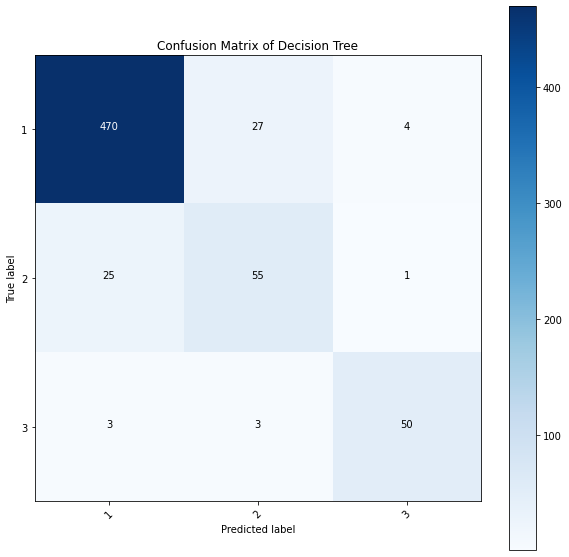

In [ ]:
import itertools
conf_matrix = metrics.confusion_matrix(y_true=y_test,y_pred=dtree.predict(x_test))

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y_test)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.colorbar()
plt.show()

tree.export_graphviz(dtree, "a_tree.dot", feature_names=fetal_health_df.columns)
!dot -Tpng a_tree.dot -o a_tree.png

In [ ]:
conf_matrix = metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y_test)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.colorbar()
plt.show()

tree.export_graphviz(dtc, "my_tree.dot", feature_names=['NINO 3.4 SST','NINO 3.4 SST Anomalies','NINO 4 SST', 'NINO 4 SST Anomalies',"OLR"])
!dot -Tpng my_tree.dot -o tree_soi.png

In [ ]:
#KNN
from sklearn import neighbors
x_train_z=pd.DataFrame(pp.scale(x_train),columns=list(x_train.columns))
x_train_z
x_test_z=pd.DataFrame(pp.scale(x_test),columns=list(x_test.columns))
x_test_z
# 建立分類器
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train_z, y_train)
print(metrics.classification_report(y_true = y_test,y_pred=knn.predict(x_test_z)))
print('訓練集:',knn.score(x_train_z,y_train))
print('測試集:',knn.score(x_test_z,y_test))

              precision    recall  f1-score   support

           1       0.93      0.96      0.95       501
           2       0.68      0.67      0.68        81
           3       0.93      0.68      0.78        56

    accuracy                           0.90       638
   macro avg       0.85      0.77      0.80       638
weighted avg       0.90      0.90      0.90       638

訓練集: 0.9314516129032258
測試集: 0.9012539184952978


In [ ]:
#XGBoost
n_estimators=100
max_depth=3
# booster=gbtree
learning_rate=0.3
# gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。

In [ ]:
x_train

,pca_hist,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
169,-25.217636,116,0.001,0.000,0.003,0.000,0.0,0.000,46,0.7,39,5.5
22,146.659804,128,0.000,0.334,0.003,0.003,0.0,0.003,34,2.5,0,4.0
499,66.747821,130,0.014,0.084,0.001,0.000,0.0,0.000,34,2.1,0,5.6
2066,-35.093267,130,0.009,0.003,0.008,0.000,0.0,0.000,65,1.7,0,1.3
1863,-18.967583,138,0.014,0.000,0.003,0.000,0.0,0.000,51,1.0,0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...
350,-78.376637,141,0.000,0.008,0.000,0.000,0.0,0.000,75,0.3,49,4.6
1930,16.154444,133,0.001,0.001,0.005,0.005,0.0,0.000,57,2.6,0,1.5
79,67.608980,145,0.005,0.010,0.005,0.000,0.0,0.000,35,1.9,0,21.3
1859,-37.811354,138,0.017,0.000,0.004,0.000,0.0,0.000,51,0.9,0,0.2


              precision    recall  f1-score   support

           1       0.96      0.98      0.97       501
           2       0.83      0.77      0.79        81
           3       0.98      0.89      0.93        56

    accuracy                           0.95       638
   macro avg       0.92      0.88      0.90       638
weighted avg       0.95      0.95      0.95       638

訓練集:  0.9993279569892473
測試集:  0.9482758620689655


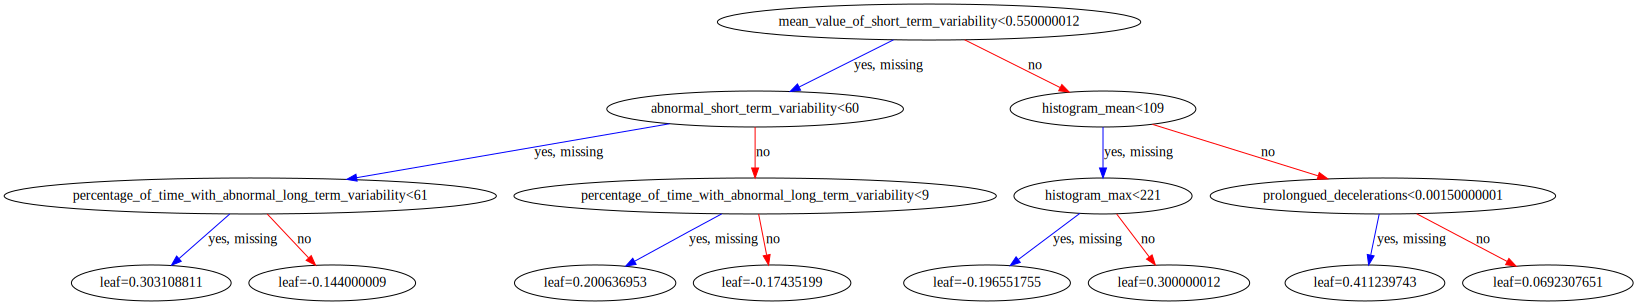

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,max_depth=max_depth)
# 使用訓練資料訓練模型
xgboostModel.fit(x_train, y_train)
# 使用訓練資料預測分類
# predicted = xgboostModel.predict(x_test)
print(metrics.classification_report(y_true = y_test,y_pred=xgboostModel.predict(x_test)))
print('訓練集: ',xgboostModel.score(x_train,y_train))
print('測試集: ',xgboostModel.score(x_test,y_test))
xgb.to_graphviz(xgboostModel)

[0.04150727 0.06886304 0.01682171 0.02966361 0.01456223 0.
 0.09460688 0.05714413 0.27292073 0.1117775  0.00982013 0.00863401
 0.01326105 0.03339301 0.0195515  0.00456621 0.03887032 0.1041844
 0.02921155 0.01473631 0.01590436]


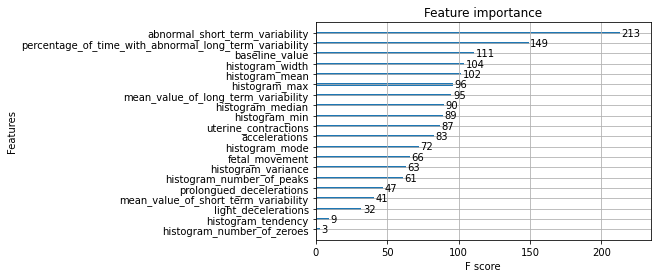

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
# feature importance
print(xgboostModel.feature_importances_)
# plot feature importance
plot_importance(xgboostModel)
pyplot.show()